# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import zero_one_loss


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [3]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()


,label,x,y
0,1,1.536830,-1.398694
1,1,1.369176,-0.637344
2,1,0.502318,-0.459105
3,1,1.833193,-1.298082
4,0,1.042356,1.121529


<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

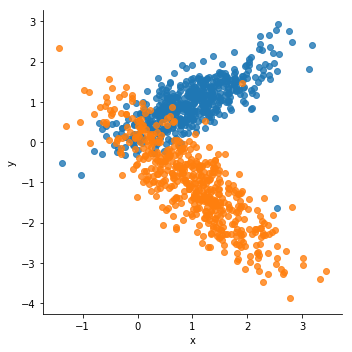

In [4]:
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='label', legend=False)


We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

<b>Exercise 2:</b>

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest. What can you conclude from this? from sklearn.

In [6]:
def zero_one_loss(y_pred, y_true):
    wrong = 0
    for i, val in enumerate(y_pred):
        if val  != y_true[i]:
            wrong = wrong +1
            
    return wrong/len(y_pred)

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)

print("Accuracy on train data is: {0:.2f} %".format(100 -zero_one_loss(prediction_train, y_train)*100))
print("Accuracy on test data is: {0:.2f} %".format(100 -zero_one_loss(prediction_test, y_test)*100))



Accuracy on train data is: 98.51 %
Accuracy on test data is: 93.64 %


## Conclusion
The default parameters already provide relatively high prediction accuracy.

## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 

In [8]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

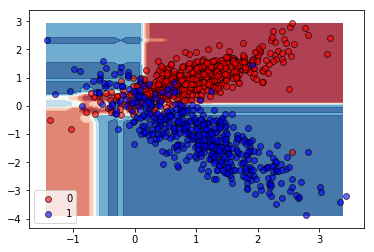

In [9]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?
## Answer:
The decision boundary is more or less congruent with the real distribution of the points over the classes

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameters. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

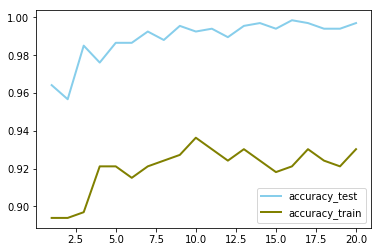

In [10]:
np.set_printoptions(suppress=True)
result = np.zeros(shape=(20,3))
for n_trees in np.arange(0,20):
    clf = RandomForestClassifier(n_estimators = n_trees+1)
    clf.fit(X_train, y_train)
    prediction_train = clf.predict(X_train)
    prediction_test = clf.predict(X_test)
    accuracy_test = 1-zero_one_loss(prediction_train, y_train)
    accuracy_train = 1-zero_one_loss(prediction_test, y_test)
    result[n_trees] = [n_trees+1, accuracy_test, accuracy_train]
result = pd.DataFrame(data=result, columns=['n_trees', 'accuracy_test', 'accuracy_train'])  # 1st row as the column names

plt.plot( 'n_trees', 'accuracy_test', data=result, marker='', color='skyblue', linewidth=2)
plt.plot( 'n_trees', 'accuracy_train', data=result, marker='', color='olive', linewidth=2)
plt.legend()

    
    
    
    

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [11]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<b>Exercise 4:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [12]:
# Let pandas do one Hot for us. This makes for a lot of columns due to the number of us states
coded_df = pd.get_dummies(churn_df, columns=["State", 
                                  "International plan", 
                                  "Voice mail plan" ], prefix=["State",  
                                                               "Int Plan", 
                                                               "V mail"])

In [13]:
# Better find and replace (im not sure if this will introduce bias, but its a mess with all those one hot coded columns)
keys = churn_df['State'].unique()
values = np.arange(0,len(keys))
repl = dict(zip(keys,values))
repl = {"State" : repl,
       "International plan" : {"Yes" : 1, "No" : 0},
       "Voice mail plan" : {"Yes" : 1, "No" : 0}}
replaced_df = churn_df.replace(repl) 
#replaced_df.head()

<b>Exercise 5:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

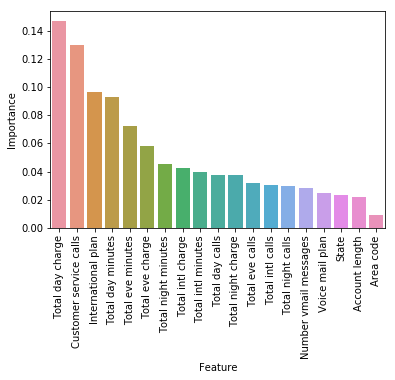

In [14]:
X_train, X_test, y_train, y_test = train_test_split(replaced_df, label, test_size=.33, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
feat_importances =clf.feature_importances_
importances_df = pd.DataFrame.from_dict({"Feature" : replaced_df.columns, "Importance" : feat_importances})
importances_df.sort_values(by = "Importance", ascending=False, inplace=True)
importances_df.reset_index(inplace=True)
plt.xticks(rotation='vertical')
ax = sns.barplot(x="Feature", y="Importance", data=importances_df)
#plt.plot(importances_df.index, importances_df['Importance'].cumsum())



## Conclusion
In this model, the features Total day charge and number of customer service calls are the most important. Probably by only using the three or four most important features we could also get a decent model.

<b>Exercise 6:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [15]:
from sklearn.metrics import mean_squared_error
data, label = make_regression(n_samples=1000, n_features=10)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=.33, random_state=42)
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)
error_train = mean_squared_error(y_train, prediction_train)
error_prediction = mean_squared_error(y_test, prediction_test)
print("Mean squared error is {} for training data and {} for test data.".format(error_train,error_prediction))


Mean squared error is 1641.6395494962767 for training data and 8921.155142520262 for test data.


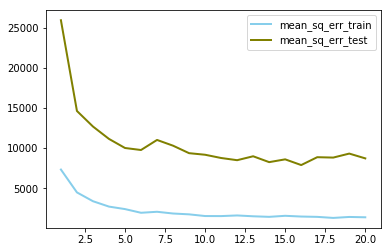

In [16]:
np.set_printoptions(suppress=True)
result = np.zeros(shape=(20,3))
for n_trees in np.arange(0,20):
    clf = RandomForestRegressor(n_estimators = n_trees+1)
    clf.fit(X_train, y_train)
    prediction_train = clf.predict(X_train)
    prediction_test = clf.predict(X_test)
    mean_sq_err_train = mean_squared_error(y_train, prediction_train)
    mean_sq_err_test = mean_squared_error(y_test, prediction_test)
    result[n_trees] = [n_trees+1, mean_sq_err_train, mean_sq_err_test]
result = pd.DataFrame(data=result, columns=['n_trees', 'mean_sq_err_train', 'mean_sq_err_test'])  # 1st row as the column names

plt.plot( 'n_trees', 'mean_sq_err_train', data=result, marker='', color='skyblue', linewidth=2)
plt.plot( 'n_trees', 'mean_sq_err_test', data=result, marker='', color='olive', linewidth=2)
plt.legend()